# CGPA-prediction


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Reading dataset
df=pd.read_csv("Grades.csv")

In [3]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
output = df['CGPA']
output

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [8]:
# Droping those features which perform no role in target computation
dataset=df.drop(['CGPA', 'Seat No.'], axis='columns')

In [9]:
dataset.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


In [10]:
GPA = {"A+": 4.0,
    "A": 4.0,
    "A-" : 3.7,
    "B+" : 3.4,
    "B" : 3.0,
    "B-" : 2.7,
    "C+" : 2.4,
    "C" : 2.0,
    "C-" : 1.7,
    "D+" : 1.4,
    "D" : 1.0,
    "F" : 0.0,
    "WU" :0}
# Making string values integer by assigning GPs to grades
for i in dataset:
    dataset[i]=dataset[i].map(GPA)
dataset.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [11]:
#filling the null values
dataset[0:] = dataset[0:].fillna(0)

In [12]:
# Calculating grade points by multiplying grade points with credit hours
four=[0,5,6,8,9,10,13,18,19,20,21,25,30,31,32,38,39]
three=[2,3,4,7,12,14,15,16,22,23,26,28,33,34,37]
two=[1,11,24,27,29,35,36,40]
one=[17]
for i in four:
  dataset.iloc[:, i]=dataset.iloc[:, i]*4
for i in three:
  dataset.iloc[:, i]=dataset.iloc[:, i]*3
for i in two:
  dataset.iloc[:, i]=dataset.iloc[:, i]*2
    
dataset.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,8.0,6.8,5.1,5.1,3.4,7.4,12.0,6.8,12.0,7.4
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,4.0,5.6,3.0,6.0,2.0,7.4,8.1,8.0,8.0,6.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,14.8,12.0,9.0,12.0,4.0,8.0,12.0,16.0,14.8,8.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,6.8,5.6,6.0,4.2,3.4,5.4,9.0,9.6,9.6,4.8
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,14.8,10.8,10.2,10.2,5.4,7.4,12.0,14.8,14.8,8.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
# Taking all first year courses in variable first_year
first_year=dataset.loc[:, "PH-121":"CS-107"]

In [17]:
first_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,13.6
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,10.8
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,8.0


In [18]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_year,output,test_size=0.2)

## FIRST YEAR

## LinearRegression

In [28]:
reg =LinearRegression()

In [21]:
#applying model for training 
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions_reg = reg.predict(X_test)
predictions_reg

array([3.29946676, 2.68453198, 2.68463203, 3.41224671, 3.10689861,
       3.64849108, 3.01703805, 2.71487514, 3.19627578, 3.20145234,
       2.99048326, 3.08248953, 2.60375632, 2.91117444, 2.02228015,
       3.59460933, 3.68727564, 3.10866376, 3.66151317, 2.46121339,
       2.77447073, 3.62924022, 3.59302809, 3.41597077, 3.27446245,
       2.21995506, 3.26326536, 3.19499459, 3.495846  , 3.39769192,
       3.47722188, 1.95571412, 3.28188538, 1.43562985, 2.93223704,
       2.84684071, 3.73967326, 2.78123081, 1.8332982 , 2.55058867,
       3.45393763, 3.75309391, 1.47024525, 3.5782476 , 2.34652788,
       2.62050113, 2.60920608, 3.68986801, 2.6896804 , 3.52453881,
       3.04837244, 3.37290095, 2.91164785, 2.71427592, 2.95741428,
       3.34911979, 3.29066293, 3.57118146, 3.39034005, 3.32825733,
       3.49886141, 2.74431512, 3.39343056, 3.22802206, 3.76572672,
       3.57281061, 2.77358287, 1.63034485, 3.72145559, 3.8354172 ,
       3.63412818, 3.39824956, 3.79658361, 3.59072611, 3.52556

In [23]:
#evaluating the model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_reg)
rmse=np.sqrt(mse)
rmse

0.24404705488620984

In [24]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
results=[]
cross_value=cross_val_score(reg, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.46380151, 0.8018767 , 0.88740278, 0.89466563, 0.60690243,
       0.90225161, 0.79055062, 0.88999722, 0.82673116, 0.58923828])

In [27]:
# Claculating accuracy
reg.score(X_test,y_test)

0.8461206413399028

## Support Vector Machine

In [29]:
# Importing support vector regression model
from sklearn.svm import SVR 
svm=SVR()

In [30]:
# Applying model on training data
svm.fit(X_train,y_train)

SVR()

In [31]:
# Prediction on test data 
predictions_svm=svm.predict(X_test)
predictions_svm

array([3.32339306, 2.6877403 , 2.78635201, 3.40067595, 3.04799724,
       3.73987724, 2.98447728, 2.75945023, 3.18550484, 3.00905815,
       2.96683537, 3.11858669, 2.86697412, 2.70185356, 1.86700181,
       3.70128967, 3.80323383, 3.12493512, 3.68488276, 2.46537881,
       2.72062779, 3.812726  , 3.60700398, 3.42160466, 3.31872041,
       2.22190084, 3.20741637, 3.21211667, 3.53918332, 3.34685845,
       3.48891645, 1.94711103, 3.28084607, 1.52441529, 3.03790821,
       2.77196768, 3.76983733, 2.90683803, 2.01038959, 2.59718223,
       3.44129773, 3.86307082, 1.63492029, 3.71009368, 2.06533519,
       2.38270165, 2.63050875, 3.66857938, 2.67027641, 3.65404088,
       2.77313881, 3.43973861, 2.7630959 , 2.67478423, 2.8960948 ,
       3.38709227, 3.30605322, 3.60291544, 3.47991521, 3.29108864,
       3.61640789, 2.96180627, 3.41089381, 3.1172727 , 3.83412473,
       3.58441068, 2.75840614, 1.73333673, 3.81605422, 3.88447954,
       3.71505008, 3.47574463, 3.88982829, 3.67923561, 3.62960

In [32]:
# Calculating RMSE
mse=mean_squared_error(y_test,predictions_svm)
rmse=np.sqrt(mse)
rmse

0.24453775666975658

In [33]:
# Calculating Accuracy of SVR model
svm.score(X_test,y_test)

0.8455012133523987

In [34]:
# Test data is cross validated with CV value 10 which returns the array of scores
cross_value=cross_val_score(svm, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.55055102, 0.75302171, 0.89694336, 0.89996885, 0.6211365 ,
       0.90369652, 0.86973094, 0.93681334, 0.86125525, 0.58791852])

## MODEL 2


In [35]:
#2ND YEAR

In [37]:
# Saving first year and second year courses in variable seccond_year
second_year=dataset.loc[:, "PH-121":"CS-215"]

In [38]:
second_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,3.0,14.8,8.1,7.2,4.2,1.4,4.0,16.0,4.0,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,8.1,6.8,4.2,4.2,3.0,2.0,4.0,10.8,8.0,4.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,12.0,16.0,12.0,12.0,12.0,4.0,14.8,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,4.2,10.8,3.0,6.0,10.2,2.4,4.0,5.6,4.0,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,12.0,14.8,11.1,11.1,8.1,4.0,14.8,16.0,14.8,14.8


In [39]:
# Splitting trainin and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(second_year,output,test_size=0.2)

## LinearRegression

In [41]:
reg2=LinearRegression()

In [42]:
# Applying model on training data
reg2.fit(X_train,y_train)

LinearRegression()

In [43]:

# Predictions on test data
predictions_reg2=reg2.predict(X_test)
predictions_reg2

array([3.46079421, 3.36544819, 3.01250015, 3.55122349, 3.12279536,
       2.9367412 , 3.76977909, 2.99116113, 3.31943882, 2.01941498,
       2.68131075, 3.15008265, 3.3394311 , 2.9934603 , 2.54404786,
       3.1498079 , 2.3183332 , 3.23395894, 3.79859474, 3.77892278,
       3.24590089, 2.26157936, 2.93705966, 3.55325201, 2.79610152,
       1.92459041, 3.27570889, 2.80739841, 3.71749843, 3.32835417,
       2.56489416, 2.89179382, 3.44283706, 2.44807579, 3.10365496,
       3.13978346, 2.14261237, 3.30670134, 3.67597399, 2.65485655,
       2.5984455 , 2.9077342 , 3.82496702, 2.82506667, 3.49731873,
       2.83548758, 2.21262627, 3.02199835, 3.47311617, 2.65698813,
       2.84685989, 1.44446445, 3.59317482, 2.45223858, 3.19184964,
       3.47407476, 2.81196379, 2.30402914, 3.16045129, 3.3468094 ,
       1.74455481, 3.71925097, 2.68668978, 3.38448454, 2.67416652,
       3.83175849, 3.36243189, 2.89609329, 3.44657927, 3.50590153,
       2.01337447, 3.22746256, 3.56042022, 2.11569645, 2.68320

In [44]:
# Calculating RMSE

mse=mean_squared_error(y_test,predictions_reg2)
rmse=np.sqrt(mse)
rmse

0.19698488996232125

In [45]:
# Test data is cross validated with CV value 10
cross_value=cross_val_score(reg2, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([ 0.75885667,  0.87705847,  0.93818225,  0.93386016,  0.92297974,
        0.93658804,  0.93099713, -0.06906805,  0.95111157,  0.84094383])

In [46]:
# Calculating Accuracy of the model
reg2.score(X_test,y_test)

0.9007094450123184

## Support Vector Machine

In [48]:
svm2=SVR()

In [50]:

# Applying model on training data
svm2.fit(X_train,y_train)

SVR()

In [51]:
# Predictions on test data
predictions_svm2 = svm2.predict(X_test)
predictions_svm2

array([3.56143869, 3.25184349, 3.03127005, 3.54828505, 3.18910202,
       2.71159379, 3.80653935, 3.14444091, 3.3619426 , 1.75309145,
       2.78295339, 3.19648321, 3.38766512, 3.10057823, 2.69687918,
       3.19024788, 2.37202586, 3.29193335, 3.82173419, 3.84422527,
       3.25023651, 2.31083975, 2.88596426, 3.63521516, 2.69842748,
       1.99541506, 3.2295388 , 2.71308133, 3.73197956, 3.36247667,
       2.65301829, 2.8764569 , 3.52550254, 2.48610417, 3.12541911,
       3.16070659, 2.04971298, 3.20814587, 3.69052308, 2.58053659,
       2.54523897, 2.94893672, 3.8440444 , 2.67834826, 3.53782081,
       2.79062355, 2.22085717, 3.03259465, 3.52603288, 2.61199735,
       2.87487911, 1.64176533, 3.6411901 , 2.34914982, 3.13228389,
       3.55384205, 2.99140078, 2.25008707, 3.14815181, 3.33213669,
       1.78231995, 3.74269711, 2.51461144, 3.32864784, 2.56405859,
       3.86511688, 3.4626459 , 3.08375343, 3.38607786, 3.5300437 ,
       1.98350744, 3.14375226, 3.60292172, 2.09381558, 2.56922

In [52]:
# Calculating RMSE
mse=mean_squared_error(y_test,predictions_svm2)
rmse=np.sqrt(mse)
rmse

0.14445366581198507

In [53]:
# Calculating accuracy of the model
svm2.score(X_test,y_test)

0.9466051655029275

In [54]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(svm2, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.90060334, 0.92467484, 0.95970688, 0.9577698 , 0.91930703,
       0.95590015, 0.92542409, 0.63269896, 0.98409792, 0.76486255])

## MODEL 3

In [55]:
# 3RD YEAR

In [57]:
# Saving courses from first year to third year in variable Third_year
Third_year=dataset.loc[:, "PH-121":"CS-317"]

In [58]:
Third_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,4.8,12.0,6.0,4.8,10.2,4.0,6.8,8.0,6.8,5.1
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,3.4,14.8,4.2,3.4,5.1,4.0,14.8,4.0,5.6,3.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,8.0,13.6,11.1,6.0,12.0,6.8,14.8,14.8,12.0,9.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,5.4,4.0,8.1,2.8,5.1,2.8,13.6,6.8,5.6,6.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,7.4,10.8,11.1,4.8,11.1,7.4,10.8,14.8,10.8,10.2


In [69]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(Third_year,output,test_size=0.2)

## LinearRegression

In [60]:
reg3=LinearRegression()

In [74]:
reg3=LinearRegression()
# Applying model on training data
reg3.fit(X_train,y_train)

LinearRegression()

In [76]:
# Predictions on test data
predictions_reg3 = reg3.predict(X_test)
predictions_reg3

array([3.24462247, 2.74436957, 3.7423554 , 2.65142221, 3.08252611,
       3.73054034, 2.17335115, 3.2836374 , 2.86502642, 2.3779906 ,
       3.24121662, 3.67383044, 2.84419468, 2.35352358, 3.82971441,
       3.62322143, 3.03402476, 3.62482278, 3.0409197 , 2.81486583,
       1.46769244, 1.9815996 , 2.91739029, 2.11555982, 3.33759892,
       3.88570876, 2.73031412, 2.29249156, 2.13080784, 3.7241881 ,
       2.9213669 , 3.11758435, 2.42958407, 1.69068757, 2.30216775,
       2.85055307, 2.66943057, 3.65491483, 2.74184161, 3.51383723,
       2.13429815, 2.46868894, 3.41731786, 3.89766851, 3.53587523,
       3.88982141, 3.58594258, 2.70084167, 2.84441837, 3.41794904,
       3.37073923, 3.77250387, 3.8473221 , 3.00373278, 3.21683513,
       3.04790039, 2.3000233 , 0.88408996, 2.90496871, 2.76608437,
       3.75115531, 2.41047969, 3.20173007, 2.49782907, 3.49868795,
       2.56907145, 3.57364936, 2.42485357, 3.61092442, 2.91490443,
       2.79179049, 3.2884961 , 2.68949337, 2.64816268, 2.85520

In [77]:
mse=mean_squared_error(y_test,predictions_reg3)
rmse=np.sqrt(mse)
rmse

0.1407772760562424

In [79]:
# Calculating accuracy of the model
reg3.score(X_test,y_test)

0.9458574156341795

In [80]:
cross_value=cross_val_score(reg3, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.94228623, 0.47354604, 0.98085473, 0.96581297, 0.92672592,
       0.80422961, 0.92024394, 0.89198339, 0.88763473, 0.94049837])

In [81]:
# Calculating accuracy of the model
reg3.score(X_test,y_test)

0.9458574156341795

## Support Vector Regression

In [82]:
svm3=SVR()

In [84]:
# Applying model on training data
svm3.fit(X_train,y_train)

SVR()

In [85]:
# Predictions on test data 
predictions_svm3 = svm3.predict(X_test)
predictions_svm3

array([3.2942248 , 2.7019587 , 3.83795882, 2.51703278, 3.08233977,
       3.67361781, 2.04368503, 3.24448206, 2.88467493, 2.34608101,
       3.24692605, 3.64143205, 2.85031583, 2.145084  , 3.85271093,
       3.66932483, 2.83961117, 3.59493458, 2.97828215, 2.81105785,
       2.62195925, 2.05566517, 2.86874519, 1.92769406, 3.45822176,
       3.86048488, 2.65982839, 2.24779362, 2.08104468, 3.64778412,
       2.95121623, 3.05987672, 2.53645405, 1.73502251, 2.34461037,
       2.97137287, 2.64754866, 3.67781058, 2.74055545, 3.58608158,
       2.01892978, 2.41480895, 3.4946438 , 3.84698306, 3.60323241,
       3.84190645, 3.6327811 , 2.69426701, 2.88399479, 3.51425241,
       3.43717569, 3.69641038, 3.84381068, 2.91825233, 3.08425521,
       3.06165058, 2.07285432, 1.46931168, 2.67081304, 2.72206825,
       3.6325366 , 2.42405904, 3.15681444, 2.34952434, 3.48602894,
       2.33271186, 3.53163093, 2.2703183 , 3.67259694, 2.7898822 ,
       2.78880821, 3.28962103, 2.57130113, 2.61785445, 2.79353

In [86]:
# Calculating accuracy of the model
svm3.score(X_test,y_test)

0.9844729825924654

In [87]:
# Test data is cross validated with CV value 10 which returns the array of scores
cross_value=cross_val_score(svm3, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.9709862 , 0.93318437, 0.97748587, 0.98679025, 0.80004419,
       0.98221324, 0.93864312, 0.97151315, 0.96764717, 0.96365636])

In [90]:
# Making list of models 
models=[('reg1',reg),('reg2',reg2),('LR3',reg3),('SVR1',svm),('SVR2',svm2),('SVR3',svm3)]

In [91]:
models

[('reg1', LinearRegression()),
 ('reg2', LinearRegression()),
 ('LR3', LinearRegression()),
 ('SVR1', SVR()),
 ('SVR2', SVR()),
 ('SVR3', SVR())]

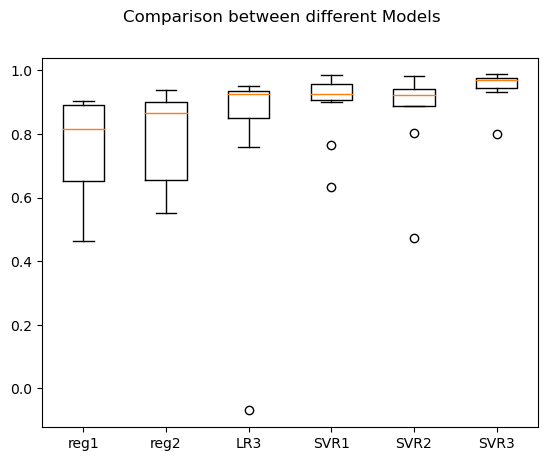

In [92]:
names = [] #Variable used to fetch names of the models in list of models
for name, model in models:
	names.append(name)

# boxplot of algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different Models')
ax = fig.add_subplot(111) # a graph of 1x1
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()